# Accenture Content Data Analysis

## Import necessary libraries and datasets

In [154]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [155]:
np.float = float    
np.int = int   #module 'numpy' has no attribute 'int'
np.object = object    #module 'numpy' has no attribute 'object'
np.bool = bool    #module 'numpy' has no attribute 'bool'

In [156]:
# Import the datasets
content_data = pd.read_csv("Content.csv")
reaction_data = pd.read_csv("Reactions.csv")
reactionType_data = pd.read_csv("ReactionTypes.csv")

## Data cleaning

### 1- Content dataset

In [157]:
# Dataset dimensions
print("Les dimensions de la base sont:",content_data.shape)

Les dimensions de la base sont: (1000, 6)


In [158]:
# Preview the dataset
content_data.head(10)

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...
5,5,cf1e8c1a-23eb-4426-9f58-002fb1b53e91,4607d7b0-3313-49b8-9f73-5b8227fc5b67,GIF,cooking,NaN
6,6,3f8590c7-6ab2-4973-805a-90cdec355f05,ae600af5-c1f0-4b1f-adb0-1b4c246373e4,video,dogs,https://socialbuzz.cdn.com/content/storage/3f8...
7,7,e5490118-90d5-4572-ab1c-1fbc87b8d9ca,583f2bde-886d-4cf3-a5c4-7cb60cd25df3,video,technology,https://socialbuzz.cdn.com/content/storage/e54...
8,8,0bedca96-fb76-4287-a83c-17330ed39cce,2bd9c167-e06c-47c1-a978-3403d6724606,photo,soccer,https://socialbuzz.cdn.com/content/storage/0be...
9,9,b18cb63f-4c8e-44ee-a47f-541e95191d11,13f0db8a-152a-496f-a6e8-1ed6a90b8788,photo,public speaking,https://socialbuzz.cdn.com/content/storage/b18...


In [159]:
# More details about the dataset
content_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [160]:
# Identify missing values
content_data.isna().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

There are only missing values in the "URL" column. Since that variable is not relevant for our analysis, we'll drop it along with the "Unnamed" variable 

In [161]:
# Drop non-relevant columns
content_data = content_data.drop(columns= ["Unnamed: 0","URL", "User ID"])

In [162]:
# Identify duplicates
content_data.duplicated().sum()

0

There is no duplicated row in the dataset

In [163]:
# Rename columns
content_data.rename(columns={'Type': 'Content Type'}, inplace= True)

In [164]:
#Another way
#content_data.rename(columns={content_data.columns[1]: 'Content Type'}, inplace= True)

In [165]:
# Inspect the unique values of "Content Type"
print(content_data['Content Type'].unique())

['photo' 'video' 'GIF' 'audio']


In [166]:
# Standardize the typos
content_data['Content Type'] = content_data['Content Type'].str.title()

In [167]:
# Inspect the unique values of "Category"
print(content_data['Category'].unique())

['Studying' 'healthy eating' 'technology' 'food' 'cooking' 'dogs' 'soccer'
 'public speaking' 'science' 'tennis' 'travel' 'fitness' 'education'
 'studying' 'veganism' 'Animals' 'animals' 'culture' '"culture"' 'Fitness'
 '"studying"' 'Veganism' '"animals"' 'Travel' '"soccer"' 'Education'
 '"dogs"' 'Technology' 'Soccer' '"tennis"' 'Culture' '"food"' 'Food'
 '"technology"' 'Healthy Eating' '"cooking"' 'Science' '"public speaking"'
 '"veganism"' 'Public Speaking' '"science"']


Some of the unique values are not uniforms: '"culture"', '"soccer"', '"animals"'

In [168]:
# Standardize the typos
content_data['Category'] = content_data['Category'].replace('"','', regex=True)
content_data['Category'] = content_data['Category'].str.title()

In [169]:
# Another way
#content_data['Category'] = content_data['Category'].str.title().replace('"','', regex=True)

In [170]:
# Let's check it
print(content_data['Category'].unique())

['Studying' 'Healthy Eating' 'Technology' 'Food' 'Cooking' 'Dogs' 'Soccer'
 'Public Speaking' 'Science' 'Tennis' 'Travel' 'Fitness' 'Education'
 'Veganism' 'Animals' 'Culture']


Job done here

### 2- Reaction dataset

In [171]:
# Dataset dimensions
reaction_data.shape

(25553, 5)

In [172]:
# Preview the dataset
reaction_data.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [173]:
# More details about the dataset
reaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


In [174]:
# Identify percentage of missing values
reaction_data.isna().sum()*100/reaction_data.shape[0]

Unnamed: 0     0.000000
Content ID     0.000000
User ID       11.814660
Type           3.835166
Datetime       0.000000
dtype: float64

In [175]:
# Drop missing values
reaction_data = reaction_data.dropna(axis=0, subset='User ID')

In [176]:
reaction_data.isna().sum()/reaction_data.shape[0]

Unnamed: 0    0.0
Content ID    0.0
User ID       0.0
Type          0.0
Datetime      0.0
dtype: float64

In [177]:
# Drop irrelevant columns
reaction_data = reaction_data.drop(columns= ['Unnamed: 0', 'User ID'])

In [178]:
# Convert Dates type
reaction_data['Datetime'] = pd.to_datetime(reaction_data['Datetime'])

In [179]:
# Rename column
reaction_data.rename(columns={'Type': 'Reaction Type'}, inplace=True)

In [180]:
# Inspect unique values
print(reaction_data['Reaction Type'].unique())

['disgust' 'dislike' 'scared' 'interested' 'peeking' 'cherish' 'hate'
 'indifferent' 'super love' 'worried' 'like' 'heart' 'want' 'intrigued'
 'love' 'adore']


In [181]:
# Standardize unique values
reaction_data['Reaction Type'] = reaction_data['Reaction Type'].str.title()

In [182]:
# Data integrity tests
print("Number of missing values:", reaction_data.isna().sum())

Number of missing values: Content ID       0
Reaction Type    0
Datetime         0
dtype: int64


In [183]:
print("Number of duplicates:", reaction_data.duplicated().sum())

Number of duplicates: 0


In [184]:
reaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22534 entries, 1 to 25552
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     22534 non-null  object        
 1   Reaction Type  22534 non-null  object        
 2   Datetime       22534 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 704.2+ KB


### 3- ReactionType dataset

In [185]:
# Dataset dimensions
reactionType_data.shape

(16, 4)

In [186]:
# Preview dataset
reactionType_data.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [187]:
# More details
reactionType_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes


In [188]:
# Drop irrelevant column
reactionType_data = reactionType_data.drop(columns= "Unnamed: 0")

In [189]:
# Rename column
reactionType_data.rename(columns={'Type': 'Reaction Type'}, inplace=True)

In [190]:
# Inspect the unique values
print(reactionType_data['Reaction Type'].unique())

['heart' 'want' 'disgust' 'hate' 'interested' 'indifferent' 'love'
 'super love' 'cherish' 'adore' 'like' 'dislike' 'intrigued' 'peeking'
 'scared' 'worried']


In [191]:
print(reactionType_data['Sentiment'].unique())

['positive' 'negative' 'neutral']


In [192]:
# Standardize typos
reactionType_data['Reaction Type'] = reactionType_data['Reaction Type'].str.title()
reactionType_data['Sentiment'] = reactionType_data['Sentiment'].str.title()

In [193]:
# Data integrity tests
print("Number of missing values:", reactionType_data.isna().sum())

Number of missing values: Reaction Type    0
Sentiment        0
Score            0
dtype: int64


In [194]:
print("Number of duplicates:", reactionType_data.duplicated().sum())

Number of duplicates: 0


In [195]:
reactionType_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Reaction Type  16 non-null     object
 1   Sentiment      16 non-null     object
 2   Score          16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 512.0+ bytes


Data cleaned

In [196]:
reaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22534 entries, 1 to 25552
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     22534 non-null  object        
 1   Reaction Type  22534 non-null  object        
 2   Datetime       22534 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 704.2+ KB


In [197]:
content_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Content ID    1000 non-null   object
 1   Content Type  1000 non-null   object
 2   Category      1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


### Merge the datasets

In [198]:
# Merge Reactions with Reaction Types to get 'Sentiment' and 'Score'
reaction_data = pd.merge(reaction_data, reactionType_data, on='Reaction Type', how='left')

# Merge Reactions with Content to get 'Content Type' and 'Category'
reaction_data = pd.merge(reaction_data, content_data, on='Content ID', how='left')

# Display the updated DataFrame
reaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22534 entries, 0 to 22533
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     22534 non-null  object        
 1   Reaction Type  22534 non-null  object        
 2   Datetime       22534 non-null  datetime64[ns]
 3   Sentiment      22534 non-null  object        
 4   Score          22534 non-null  int64         
 5   Content Type   22534 non-null  object        
 6   Category       22534 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.2+ MB


In [199]:
# Display the updated DataFrame
reaction_data.head()

,Content ID,Reaction Type,Datetime,Sentiment,Score,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,Disgust,2020-11-07 09:43:50,Negative,0,Photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,Dislike,2021-06-17 12:22:51,Negative,10,Photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,Scared,2021-04-18 05:13:58,Negative,15,Photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,Disgust,2021-01-06 19:13:01,Negative,0,Photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,Interested,2020-08-23 12:25:58,Positive,30,Photo,Studying


In [200]:
# Save clean data
reaction_data.to_csv('./clean_data.csv')

## Engagement Analysis

### Which content types drive the highest engagement (measured by the number of reactions)?

In [201]:
reaction_data["Content Type"].value_counts()

Content Type
Photo    6043
Video    5728
Gif      5578
Audio    5185
Name: count, dtype: int64

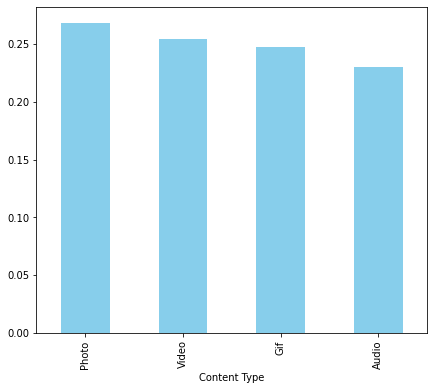

In [202]:
plt.figure(figsize=(7,6))
reaction_data["Content Type"].value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar', color='skyblue');

### Are there particular categories that users react to more frequently or positively?

In [203]:
# Count total engagement per category
engagement_counts = reaction_data['Category'].value_counts().reset_index(name='Total Engagement')

In [204]:
# Count positive engagement per category
positive_engagement = reaction_data[reaction_data['Sentiment'] == 'Positive'].groupby('Category').size().reset_index(name='Positive Engagement')

# Merge with total engagement
engagement_analysis = pd.merge(engagement_counts, positive_engagement, on='Category', how='left')
engagement_analysis['Positive Rate'] = (engagement_analysis['Positive Engagement'] / engagement_analysis['Total Engagement']) * 100
print(engagement_analysis)


           Category  Total Engagement  Positive Engagement  Positive Rate
0           Animals              1738                  962      55.350978
1           Science              1646                  934      56.743621
2    Healthy Eating              1572                  896      56.997455
3        Technology              1557                  896      57.546564
4              Food              1556                  872      56.041131
5           Culture              1538                  855      55.591678
6           Cooking              1525                  851      55.803279
7            Travel              1510                  842      55.761589
8            Soccer              1339                  752      56.161314
9         Education              1311                  751      57.284516
10          Fitness              1284                  721      56.152648
11         Studying              1251                  697      55.715428
12             Dogs              1227 

In [205]:
# Sort by Total engagement
top_categories_by_frequency = engagement_analysis.sort_values(by='Total Engagement', ascending=False)

# Sort by Positive Rate
top_categories_by_positivity = engagement_analysis.sort_values(by='Positive Rate', ascending=False)

print("Categories with the most engagements:\n", top_categories_by_frequency.head())
print("Categories with the highest positivity rate:\n", top_categories_by_positivity.head())


Categories with the most engagements:
          Category  Total Engagement  Positive Engagement  Positive Rate
0         Animals              1738                  962      55.350978
1         Science              1646                  934      56.743621
2  Healthy Eating              1572                  896      56.997455
3      Technology              1557                  896      57.546564
4            Food              1556                  872      56.041131
Categories with the highest positivity rate:
            Category  Total Engagement  Positive Engagement  Positive Rate
15  Public Speaking              1116                  661      59.229391
3        Technology              1557                  896      57.546564
9         Education              1311                  751      57.284516
2    Healthy Eating              1572                  896      56.997455
1           Science              1646                  934      56.743621


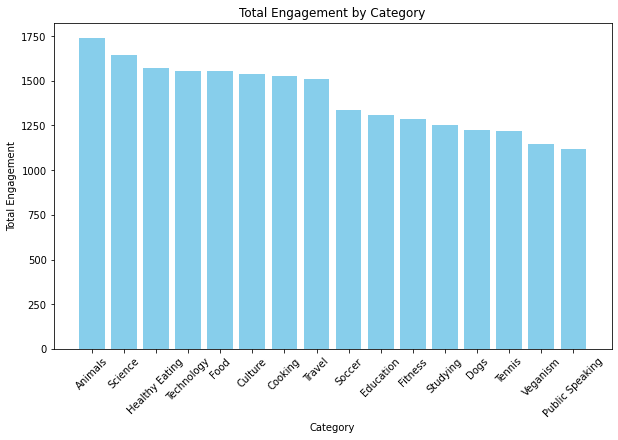

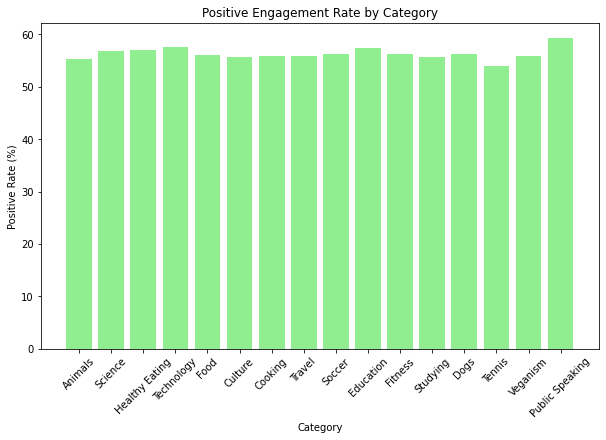

In [206]:
# Bar plot for total engagements
plt.figure(figsize=(10, 6))
plt.bar(engagement_analysis['Category'], engagement_analysis['Total Engagement'], color='skyblue')
plt.title('Total Engagement by Category')
plt.xlabel('Category')
plt.ylabel('Total Engagement')
plt.xticks(rotation=45)
plt.show()

# Bar plot for positive rate
plt.figure(figsize=(10, 6))
plt.bar(engagement_analysis['Category'], engagement_analysis['Positive Rate'], color='lightgreen')
plt.title('Positive Engagement Rate by Category')
plt.xlabel('Category')
plt.ylabel('Positive Rate (%)')
plt.xticks(rotation=45)
plt.show()

- The category 'Animals' has the highest number of reactions, followed by 'Science' and 'Healthy Eating'.

- The category 'Public Speaking' has the highest positivity rate at 59%, suggesting users strongly associate positive sentiment with this content."

### What is the distribution of reaction types across different categories?

In [207]:
# Group by Category and Reaction Type, then count occurrences
reaction_distribution = reaction_data.groupby(['Category', 'Reaction Type']).size().reset_index(name= 'Count')

# Pivot the table for better viz
reaction_pivot = reaction_distribution.pivot(index='Category', columns='Reaction Type', values='Count').fillna(0)

print(reaction_pivot)

Reaction Type    Adore  Cherish  Disgust  Dislike  Hate  Heart  Indifferent  \
Category                                                                      
Animals            104      116      108      105   118    114           91   
Cooking             99       80      100      100   100    101           77   
Culture             86      102       92      101    90     83          105   
Dogs                76       64       77       74    83     92           83   
Education           80       78       62       85    87     83           82   
Fitness             91       69       93       90    63     75           74   
Food                82      108       97       93   117    102           88   
Healthy Eating     108       95       98       90   109    103           99   
Public Speaking     76       61       62       74    54     80           69   
Science            110       98      103      102    90    105          117   
Soccer              83       76       83       74   

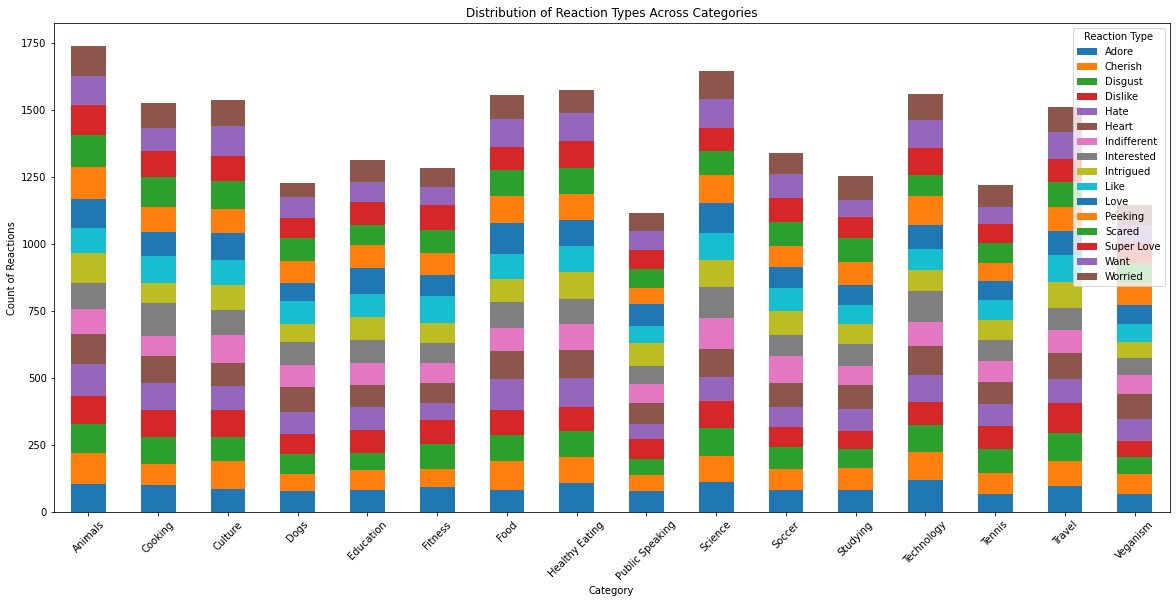

In [208]:
# Create a stacked bar chart
reaction_pivot.plot(kind='bar', stacked=True, figsize=(20,9))
plt.title('Distribution of Reaction Types Across Categories')
plt.xlabel('Category')
plt.ylabel('Count of Reactions')
plt.legend(title='Reaction Type', loc="upper right")
plt.xticks(rotation=45)
plt.show()

- In the Food category, the most common reaction type is Hate, followed by Love.

- The Travel category has a higher proportion of Dislikes compared to other categories.


## Sentiment Analysis

### Which content generates the most positive sentiment? The most negative sentiment?

In [209]:
# Group by Content ID and Sentiment, then count
sentiment_counts = reaction_data.groupby(['Content ID', 'Sentiment']).size().reset_index(name='Count')

# Pivot table to separate Positive and Negative counts
sentiment_pivot = sentiment_counts.pivot(index='Content ID', columns='Sentiment', values='Count').fillna(0)

# Add total reactions per content for context 
sentiment_pivot['Total Reactions'] = sentiment_pivot.sum(axis=1)

print(sentiment_pivot)


Sentiment                             Negative  Neutral  Positive  \
Content ID                                                          
004e820e-49c3-4ba2-9d02-62db0065410c       0.0      0.0       1.0   
00d0cdf9-5919-4102-bf84-ebde253c3cd2      13.0      4.0      25.0   
01396602-c759-4a17-90f0-8f9b3ca11b30      15.0      3.0      18.0   
019b61f4-926c-438e-adaf-6119c5eab752       4.0      2.0       6.0   
01ab84dd-6364-4236-abbb-3f237db77180       1.0      0.0       0.0   
...                                        ...      ...       ...   
fdca8d15-966b-4825-8133-1fafc5c1f9fc       8.0      2.0      15.0   
fe06b730-b1f8-4f55-af1a-52487d8f1ec6       8.0      3.0      12.0   
fea8d77c-fd0b-4678-868f-fbae567642f3       1.0      1.0       4.0   
fea9077f-2fe7-43bd-aaef-dc2619988d94       1.0      3.0       2.0   
ff883828-a610-492d-8635-8a777eaad25f      15.0      8.0      21.0   

Sentiment                             Total Reactions  
Content ID                                    

In [210]:
# Identify the most positive content
most_positive_content = sentiment_pivot.sort_values(by='Positive', ascending=False).head(1)
print("Content with the most positive sentiment:\n", most_positive_content)


Content with the most positive sentiment:
 Sentiment                             Negative  Neutral  Positive  \
Content ID                                                          
cd568dd1-70cf-45d6-b495-10eebff8c920       8.0      4.0      32.0   

Sentiment                             Total Reactions  
Content ID                                             
cd568dd1-70cf-45d6-b495-10eebff8c920             44.0  


In [211]:
# Identify the most negative content
most_negative_content = sentiment_pivot.sort_values(by='Negative', ascending=False).head(1)
print("Content with the most negative sentiment:\n", most_negative_content)


Content with the most negative sentiment:
 Sentiment                             Negative  Neutral  Positive  \
Content ID                                                          
d90a34f1-60ed-4a79-b7bf-fd22efa12e4c      23.0      3.0      18.0   

Sentiment                             Total Reactions  
Content ID                                             
d90a34f1-60ed-4a79-b7bf-fd22efa12e4c             44.0  


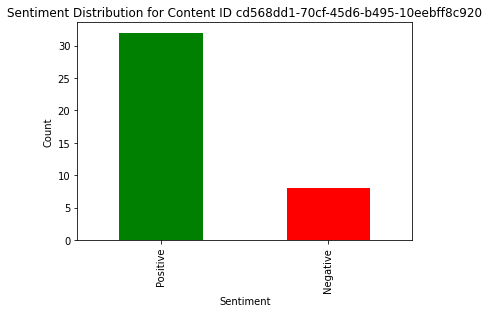

In [212]:
# Bar chart for a specific content
top_content_id = most_positive_content.index[0]
top_content_data = sentiment_pivot.loc[top_content_id]

top_content_data[['Positive', 'Negative']].plot(kind='bar', color=['green', 'red'])
plt.title(f'Sentiment Distribution for Content ID {top_content_id}')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


- Content ID cd568dd1-70cf-45d6-b495-10eebff8c920 generated the most positive reactions, with 32 positive sentiments out of 44 total reactions (72.73% positivity rate)

- Content ID d90a34f1-60ed-4a79-b7bf-fd22efa12e4c generated the most negative reactions, with 23 negative sentiments out of 44 total reactions (52.27% negativity rate).

### Are there any patterns between content type or category and sentiment trends?

In [213]:
# Group by Content Type and Sentiment
content_type_sentiment = reaction_data.groupby(['Content Type', 'Sentiment']).size().reset_index(name='Count')

# Pivot table for better readability
content_type_pivot = content_type_sentiment.pivot(index='Content Type', columns='Sentiment', values='Count').fillna(0)

# Add totals for context
content_type_pivot['Total Reactions'] = content_type_pivot.sum(axis=1)

print(content_type_pivot)

# Group by Category and Sentiment
category_sentiment = reaction_data.groupby(['Category', 'Sentiment']).size().reset_index(name='Count')

# Pivot table for better readability
category_pivot = category_sentiment.pivot(index='Category', columns='Sentiment', values='Count').fillna(0)

# Add totals for context
category_pivot['Total Reactions'] = category_pivot.sum(axis=1)

print(category_pivot)


Sentiment     Negative  Neutral  Positive  Total Reactions
Content Type                                              
Audio             1608      613      2964             5185
Gif               1758      715      3105             5578
Photo             1878      767      3398             6043
Video             1793      728      3207             5728
Sentiment        Negative  Neutral  Positive  Total Reactions
Category                                                     
Animals               566      210       962             1738
Cooking               502      172       851             1525
Culture               488      195       855             1538
Dogs                  371      167       689             1227
Education             389      171       751             1311
Fitness               409      154       721             1284
Food                  493      191       872             1556
Healthy Eating        477      199       896             1572
Public Speaking       326 

In [214]:
# Normalize Content Type Sentiments
content_type_pivot['Positive Rate'] = (content_type_pivot['Positive'] / content_type_pivot['Total Reactions']) * 100
content_type_pivot['Negative Rate'] = (content_type_pivot['Negative'] / content_type_pivot['Total Reactions']) * 100

# Normalize Category Sentiments
category_pivot['Positive Rate'] = (category_pivot['Positive'] / category_pivot['Total Reactions']) * 100
category_pivot['Negative Rate'] = (category_pivot['Negative'] / category_pivot['Total Reactions']) * 100

print(content_type_pivot[['Positive Rate', 'Negative Rate']])
print(category_pivot[['Positive Rate', 'Negative Rate']])

Sentiment     Positive Rate  Negative Rate
Content Type                              
Audio             57.164899      31.012536
Gif               55.665113      31.516673
Photo             56.230349      31.077279
Video             55.988128      31.302374
Sentiment        Positive Rate  Negative Rate
Category                                     
Animals              55.350978      32.566168
Cooking              55.803279      32.918033
Culture              55.591678      31.729519
Dogs                 56.153219      30.236349
Education            57.284516      29.672006
Fitness              56.152648      31.853583
Food                 56.041131      31.683805
Healthy Eating       56.997455      30.343511
Public Speaking      59.229391      29.211470
Science              56.743621      29.829891
Soccer               56.161314      30.171770
Studying             55.715428      31.734612
Technology           57.546564      29.865125
Tennis               53.858785      33.908046
Travel

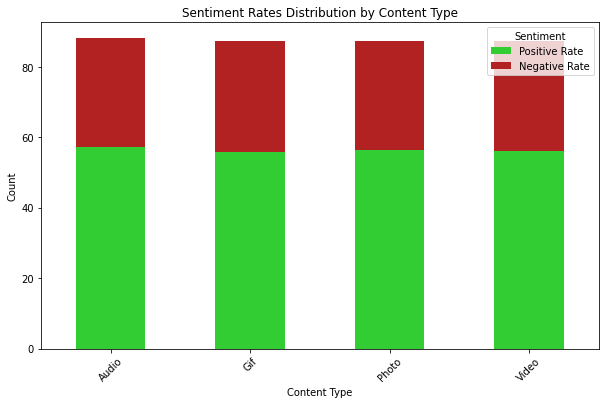

In [215]:
# Bar Chart for Content Type Sentiment Trends
content_type_pivot[['Positive Rate', 'Negative Rate']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['limegreen', 'firebrick'])
plt.title('Sentiment Rates Distribution by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()


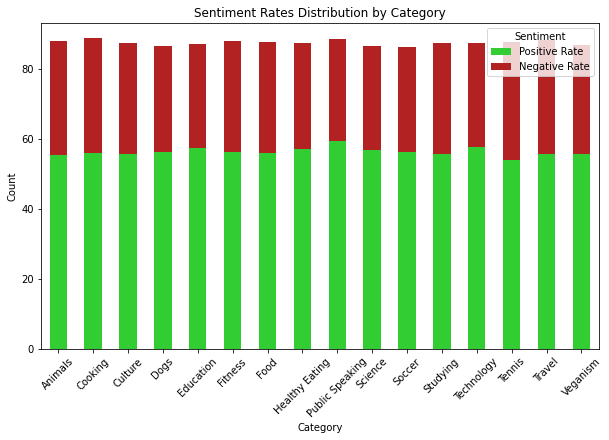

In [216]:
# Bar Chart for Category Sentiment Trends
category_pivot[['Positive Rate', 'Negative Rate']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['limegreen', 'firebrick'])
plt.title('Sentiment Rates Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

- Content in the Public Speaking category shows a higher proportion of Positive sentiments (59.2%), while Cooking content has a significant share of Negative sentiments (32.91%).

- Photos consistently generate more positive sentiments but in terms of rates, the audio contents have the higher rates.

## Performance Metrics

### How do different scores vary across categories and content types?

In [217]:
# Group by Content Type and calculate statistics
content_type_scores = reaction_data.groupby('Content Type')['Score'].agg(['mean', 'median', 'std']).reset_index()
print("Score statistics by Content Type:")
print(content_type_scores)


Score statistics by Content Type:
  Content Type       mean  median        std
0        Audio  40.098554    45.0  26.136316
1          Gif  39.247401    35.0  25.996871
2        Photo  39.895747    45.0  26.086342
3        Video  39.378317    35.0  25.924024


In [218]:
# Group by Category and calculate statistics
category_scores = reaction_data.groupby('Category')['Score'].agg(['mean', 'median', 'std']).reset_index()
print("Score statistics by Category:")
print(category_scores)

Score statistics by Category:
           Category       mean  median        std
0           Animals  39.484465    35.0  26.203074
1           Cooking  38.802623    35.0  26.072174
2           Culture  39.442783    35.0  26.079722
3              Dogs  39.444173    35.0  25.797191
4         Education  40.243326    45.0  25.648168
5           Fitness  39.591121    45.0  26.158435
6              Food  39.587404    35.0  26.173194
7    Healthy Eating  40.164122    45.0  26.157770
8   Public Speaking  40.995520    45.0  25.756204
9           Science  39.735723    35.0  25.775156
10           Soccer  39.743092    45.0  25.901152
11         Studying  39.521982    35.0  25.882166
12       Technology  40.484907    45.0  26.352720
13           Tennis  37.918719    35.0  26.171311
14           Travel  39.309934    45.0  26.211493
15         Veganism  40.053229    45.0  26.034974


In [219]:
from scipy.stats import f_oneway

# One-way ANOVA for Content Type
content_type_groups = [group['Score'].values for _, group in reaction_data.groupby('Content Type')]
f_stat, p_value = f_oneway(*content_type_groups)
print(f"ANOVA results for Content Type - F-statistic: {f_stat}, p-value: {p_value}")

# One-way ANOVA for Category
category_groups = [group['Score'].values for _, group in reaction_data.groupby('Category')]
f_stat, p_value = f_oneway(*category_groups)
print(f"ANOVA results for Category - F-statistic: {f_stat}, p-value: {p_value}")


ANOVA results for Content Type - F-statistic: 1.3450793651086559, p-value: 0.2577130700035412
ANOVA results for Category - F-statistic: 0.9156091000532722, p-value: 0.545798045856223


A p-value greater than 0.05 suggests that the differences in mean Score values across the groups are not statistically significant.

The data does not provide enough evidence to conclude that the mean Score differs significantly across Content Type groups or the Category groups.

The observed differences in group means could be due to random variation rather than meaningful patterns.

- Audio have the highest average scores (40.09), indicating they are better received compared to Gif (39.24).

- The variability in scores is highest for Audio, suggesting mixed reactions.

- Public Speaking content shows the highest mean score (40.99), while Tennis has the lowest (37.91).

The Technology category has a wide range of scores, indicating diverse reactions from users.

## Time-based Trends

### Are there specific times of day or days of the week when user engagement is highest?

In [220]:
# Extract hour and day of the week from Datetime
reaction_data['Hour'] = reaction_data['Datetime'].dt.hour
reaction_data['Day_of_Week'] = reaction_data['Datetime'].dt.day_name()

# Preview the data
print(reaction_data[['Datetime', 'Hour', 'Day_of_Week']].head())

             Datetime  Hour Day_of_Week
0 2020-11-07 09:43:50     9    Saturday
1 2021-06-17 12:22:51    12    Thursday
2 2021-04-18 05:13:58     5      Sunday
3 2021-01-06 19:13:01    19   Wednesday
4 2020-08-23 12:25:58    12      Sunday


In [221]:
# Group by hour and day of the week
engagement_by_hour = reaction_data.groupby('Hour').size().reset_index(name='Total Reactions')
engagement_by_day = reaction_data.groupby('Day_of_Week').size().reset_index(name='Total Reactions')

# Order days of the week correctly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
engagement_by_day['Day_of_Week'] = pd.Categorical(engagement_by_day['Day_of_Week'], categories=days_order, ordered=True)
engagement_by_day = engagement_by_day.sort_values('Day_of_Week')

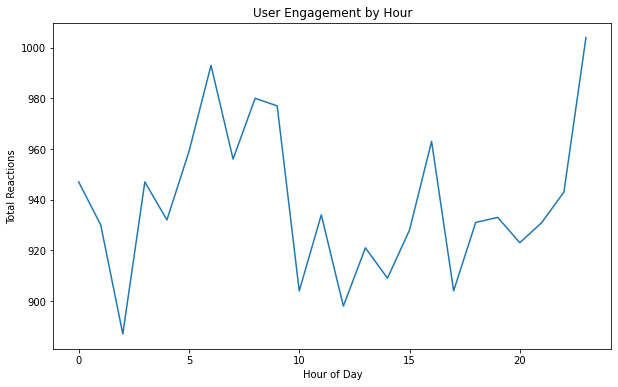

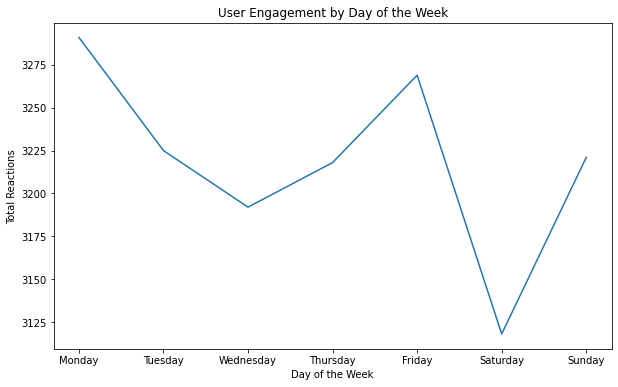

In [222]:
# Plot engagement by hour
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='Total Reactions', data=engagement_by_hour)
plt.title('User Engagement by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Reactions')
plt.show()

# Plot engagement by day of the week
plt.figure(figsize=(10, 6))
sns.lineplot(x='Day_of_Week', y='Total Reactions', data=engagement_by_day)
plt.title('User Engagement by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Reactions')
plt.show()

- User engagement is highest at 11pm and at 6am, suggesting that users are most active in the evenings and early in the morning

- Engagement peaks at Mondays and Fridays.

### Does the sentiment of reactions vary based on time (e.g., are users more negative in the evening)?

In [223]:
# Grooup by Sentiment and hour, then count reactions
Sentiment_by_hour = reaction_data.groupby(['Hour', 'Sentiment']).size().reset_index(name='Count')

# Pivot to make it easier to compare sentiments
Sentiment_hour_pivot = Sentiment_by_hour.pivot(index='Hour', columns='Sentiment', values='Count')

# Add a total reactions column for context
Sentiment_hour_pivot['Total Reactions'] = Sentiment_hour_pivot.sum(axis=1)

# Calculate the proportion of positive and negative reactions
Sentiment_hour_pivot['Positive Proportion'] = (Sentiment_hour_pivot['Positive']/ Sentiment_hour_pivot['Total Reactions']) *100
Sentiment_hour_pivot['Negative Proportion'] = (Sentiment_hour_pivot['Negative']/ Sentiment_hour_pivot['Total Reactions']) *100 

print(Sentiment_hour_pivot)

Sentiment  Negative  Neutral  Positive  Total Reactions  Positive Proportion  \
Hour                                                                           
0               316      115       516              947            54.487856   
1               290      112       528              930            56.774194   
2               267      119       501              887            56.482525   
3               294      129       524              947            55.332629   
4               295      117       520              932            55.793991   
5               305      112       542              959            56.517205   
6               309      132       552              993            55.589124   
7               305      118       533              956            55.753138   
8               317      113       550              980            56.122449   
9               311      134       532              977            54.452405   
10              284      109       511  

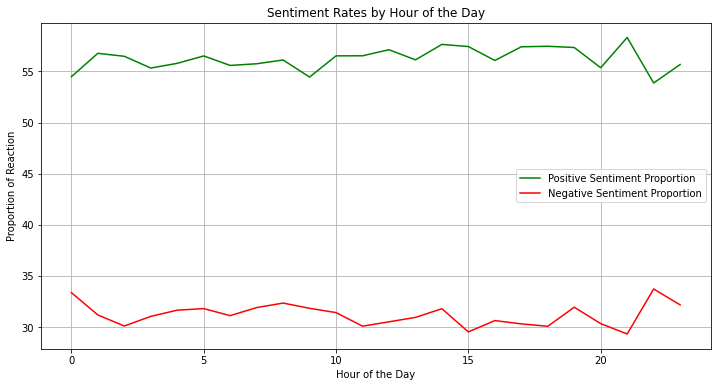

In [224]:
plt.figure(figsize=(12,6))
plt.plot(Sentiment_hour_pivot.index, Sentiment_hour_pivot['Positive Proportion'], label='Positive Sentiment Proportion', color='green')
plt.plot(Sentiment_hour_pivot.index, Sentiment_hour_pivot['Negative Proportion'], label= 'Negative Sentiment Proportion', color= 'red')
plt.title('Sentiment Rates by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Proportion of Reaction')
plt.legend()
plt.grid(True)
plt.show()

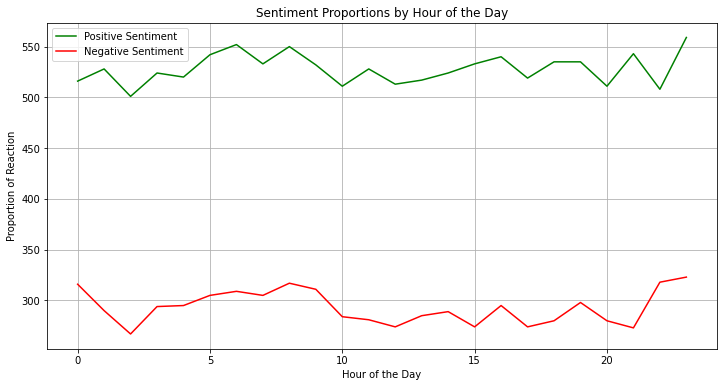

In [225]:
plt.figure(figsize=(12,6))
plt.plot(Sentiment_hour_pivot.index, Sentiment_hour_pivot['Positive'], label='Positive Sentiment', color='green')
plt.plot(Sentiment_hour_pivot.index, Sentiment_hour_pivot['Negative'], label= 'Negative Sentiment', color= 'red')
plt.title('Sentiment Proportions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Proportion of Reaction')
plt.legend()
plt.grid(True)
plt.show()

In [226]:
from scipy.stats import f_oneway

# Group by Hour and calculate average Score for ANOVA
hourly_scores = [group['Score'].values for _, group in reaction_data.groupby('Hour')]

# ANOVA test
f_stat, p_value = f_oneway(*hourly_scores)
print(f"ANOVA results - F-statistic: {f_stat}, p-value: {p_value}")

ANOVA results - F-statistic: 0.42769190635909676, p-value: 0.9922267983264537


- Positive reactions rates are highest at 9 pm 

- Negative reactions increase significantly in the evening (10 pm–12 am), possibly due to fatigue or stress at the end of the day

- Positive sentiments consistently outnumber negative sentiments overall

## User Behavior Insights

### How do high and low-scoring reactions differ in terms of their associated content and timing?

In [227]:
# Define thresholds
score_thresholds = reaction_data['Score'].quantile([0.25, 0.75])
low_score_threshold = score_thresholds[0.25]
high_score_threshold = score_thresholds[0.75]

# Create subsets
low_scoring_reactions = reaction_data[reaction_data['Score'] <= low_score_threshold]
high_scoring_reactions = reaction_data[reaction_data['Score'] >= high_score_threshold]

In [228]:
# Group and summarize by Content Type and Category
high_score_summary = high_scoring_reactions.groupby(['Content Type', 'Category']).size().reset_index(name='High Score Count')
low_score_summary = low_scoring_reactions.groupby(['Content Type', 'Category']).size().reset_index(name='Low Score Count')

# Merge high and low summaries for comparison
content_comparison = pd.merge(high_score_summary, low_score_summary, on=['Content Type', 'Category'], how='outer').fillna(0)

# Add proportions
content_comparison['High vs Low Ratio'] = content_comparison['High Score Count'] / (content_comparison['Low Score Count']+1)

# Sort by ratio
content_comparison = content_comparison.sort_values(by='High vs Low Ratio', ascending=False)
print(content_comparison.head(10))

   Content Type         Category  High Score Count  Low Score Count  \
12        Audio       Technology               176              134   
35        Photo             Dogs               107               82   
56        Video  Public Speaking               162              126   
4         Audio        Education               104               82   
10        Audio           Soccer                75               59   
42        Photo           Soccer                92               73   
50        Video          Culture               111               95   
15        Audio         Veganism               125              108   
39        Photo   Healthy Eating               102               88   
9         Audio          Science               121              107   

    High vs Low Ratio  
12           1.303704  
35           1.289157  
56           1.275591  
4            1.253012  
10           1.250000  
42           1.243243  
50           1.156250  
15           1.146789  
39

In [229]:
# Analyze timing for high scores
high_score_timing = high_scoring_reactions.groupby(['Hour', 'Day_of_Week']).size().reset_index(name='High Score Count')

# Analyze timing for low scores
low_score_timing = low_scoring_reactions.groupby(['Hour', 'Day_of_Week']).size().reset_index(name='Low Score Count')

# Merge timing summaries
timing_comparison = pd.merge(high_score_timing, low_score_timing, on=['Hour', 'Day_of_Week'], how='outer').fillna(0)

# Add proportions
timing_comparison['High vs Low Ratio'] = timing_comparison['High Score Count'] / (timing_comparison['Low Score Count'] + 1)

# Sort by ratio
timing_comparison = timing_comparison.sort_values(by='High vs Low Ratio', ascending=False)
print(timing_comparison.head(10))


     Hour Day_of_Week  High Score Count  Low Score Count  High vs Low Ratio
128    18    Saturday                48               28           1.655172
121    17    Saturday                44               28           1.517241
151    21    Thursday                53               34           1.514286
49      7      Friday                58               38           1.487179
135    19    Saturday                47               31           1.468750
26      3     Tuesday                52               35           1.444444
86     12    Saturday                39               26           1.444444
143    20      Sunday                43               29           1.433333
81     11    Thursday                44               31           1.375000
116    16    Thursday                45               32           1.363636


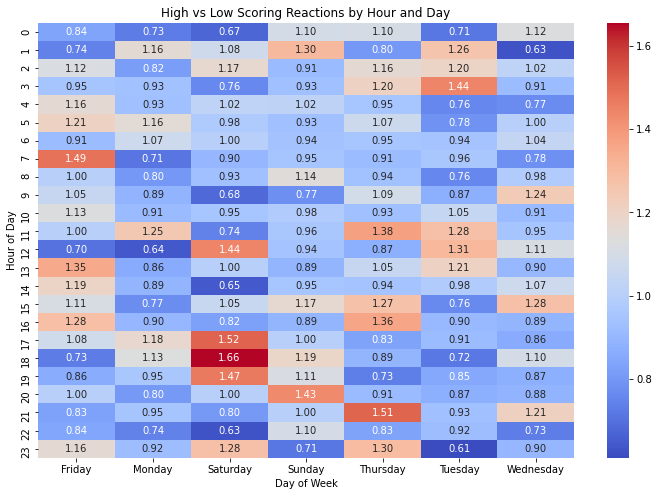

In [231]:
# Pivot for heatmap
timing_heatmap = timing_comparison.pivot_table(index='Hour', columns='Day_of_Week', values='High vs Low Ratio', fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(timing_heatmap, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('High vs Low Scoring Reactions by Hour and Day')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()
